<a href="https://colab.research.google.com/github/AFBA1993/DeepLearningTutorials/blob/main/SOM/credit_data_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install minisom

In [17]:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot

In [4]:
base = pd.read_csv('/content/drive/MyDrive/UdemyDeepCSVs/credit_data.csv')
base = base.dropna()
base.loc[base.age < 0, 'age'] = 40.92

In [6]:
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

In [7]:
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [15]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

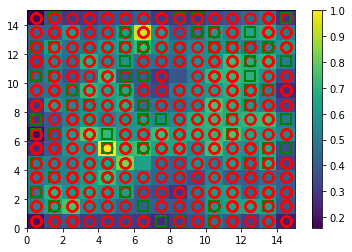

In [19]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
       markersize = 10, markerfacecolor = 'None',
       markeredgecolor = colors[y[i]], markeredgewidth = 2)

In [21]:
mapeamento = som.win_map(X)
suspeitos = np.concatenate((mapeamento[(13,9)], mapeamento[(1,10)]), axis = 0)
suspeitos = normalizador.inverse_transform(suspeitos)

In [26]:
classe = []
for i in range(len(base)):
    for j in range(len(suspeitos)):
       if base.iloc[i, 0] == int(round(suspeitos[j,0])):
           classe.append(base.iloc[i,4])
classe = np.asarray(classe)

suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]

In [27]:
suspeitos_final

array([[1.01000000e+02, 5.14610532e+04, 3.66515586e+01, 7.29226418e+03,
        0.00000000e+00],
       [3.13000000e+02, 5.14550985e+04, 3.72856837e+01, 9.44711716e+03,
        0.00000000e+00],
       [1.05500000e+03, 2.48207925e+04, 3.82440169e+01, 5.19492428e+01,
        0.00000000e+00],
       [1.16400000e+03, 3.09611661e+04, 3.21142866e+01, 1.62795596e+02,
        0.00000000e+00],
       [1.17200000e+03, 3.00372031e+04, 3.86849202e+01, 1.24701279e+03,
        0.00000000e+00],
       [1.20000000e+03, 2.62675294e+04, 3.44963862e+01, 5.94691634e+01,
        0.00000000e+00],
       [1.21500000e+03, 2.68671083e+04, 3.26222996e+01, 1.73015191e+03,
        0.00000000e+00],
       [1.24800000e+03, 3.17227309e+04, 3.48518173e+01, 2.87775610e+03,
        0.00000000e+00],
       [1.32200000e+03, 3.69703604e+04, 3.37045991e+01, 1.26850638e+03,
        0.00000000e+00],
       [1.37400000e+03, 3.13968660e+04, 3.49966814e+01, 3.71923013e+03,
        0.00000000e+00],
       [1.54000000e+03, 3.6455